# Decision Tree Optimization

In this exercise you will train multiple Decision Tree Classification models using using different values of hyperparameter "Max Depth" and compare the accuracy of each model. You will train the Decision Tree models on "cell2cell" -- a telecom company churn prediction data set.


### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the scikit-learn `DecisionTreeClassifier`, the `train_test_split()` function for splitting the data into training and test sets, and the metric `accuracy_score` to evaluate our model.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 1. Load a 'ready-to-fit' Data Set

###  Load a Data Set and Save it as a Pandas DataFrame

We will work with a version of "cell2celltrain" that already has all the necessary pre-processing steps implemented, including one-hot encoding of the categorical values.

In [3]:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)

## Step 2: Create Labeled Examples from the Data Set for the Training Phase


Let's obtain columns from our data set to create labeled examples. 
In the code cell below carry out the following steps:

* Get the `Churn` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Assign all other columns from DataFrame `df` to the variable `X`. These will be our features. 

You should have 51047 labeled examples. Each example contains 52 features and one label (`Churn`).


### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [4]:
# YOUR CODE HERE
y = df['Churn']
X = df.drop(columns = 'Churn', axis=1)

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))



Number of examples: 51047

Number of Features:84
['CustomerID', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'HomeownershipKnown', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCre

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [5]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testXY

try:
    p, err = testXY(y,X,df)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 3: Create Training and Test Data Sets

In the code cell below to use the `train_test_split()` function to create training and test sets out of the labeled examples. 

You will call `train_test_split()` function with the following arguments:
    
1. Variable `X` containing features.
2. Variable `y` containing the label.
3. A test set that is 30 percent of the size of the data set. More specifically, use the parameter `test_size=0.30`.
4. A seed value of `123`. More specifically, use the parameter `random_state=123`.
    
The `train_test_split()` function will return four outputs (data subsets). Assign these outputs to the following variable names, using the following order:  `X_train`, `X_test`, `y_train`, `y_test`. 

Note that you will be able to accomplish this using one line of code.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [6]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [7]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testSplit

try:
    p, err = testSplit(X_train, X_test, y_train, y_test, df)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    


Correct!


Check that the dimensions of the training and test datasets are what you expected:

In [8]:
print(X_train.shape)
print(X_test.shape)

(35732, 84)
(15315, 84)


## Step 4: Fit a Decision Tree Classification Model and Evaluate the Model

The code cell below contains a shell of a function named `train_test_DT()`. This function should train a Decision Tree classifier on the training data, test the resulting model on the test data, and compute and return the accuracy score of the resulting predicted class labels on the test data. 

Your task is to fill in the function to make it work.

Inspect the function defintion `train_test_DT(X_train, X_test, y_train, y_test, leaf, depth,  crit='entropy')`. The function expects the test and train datasets as well as a values for:

  1. leaf = The minimum number of samples required to be at a leaf node 
  2. depth = The maximum depth of the tree
  3. crit = The function to be used to measure the quality of a split. If this argument is not specified, the default is 'gini.' We specified 'entropy'.
        

In the code cell below:


1. Use ``DecisionTreeClassifier()`` to create a model object, and assign the result to the variable ```model```.  Call the method with these parameter: 
    * `criterion = crit`
    * `max_depth = depth`
    * `min_samples_leaf = leaf`
   
2. Call the ```model.fit()``` method to fit the model to the training data. The first argument should be ```X_train``` and the second argument should be ```y_train```.
<br>
3. Call the ```model.predict()``` method  with the argument ```X_test``` to use the fitted model to predict values for the test data. Store the outcome in the variable ```class_label_predictions```.
<br>
4. Call the ```accuracy_score()``` function; the first argument should be `y_test` and the second argument should be `class_label_predictions`. Assign the result to variable `acc_score`.
<br>


You might find it useful to consult the `DecisionTreeClassifier` Scikit-learn online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to see how to accomplish this tasks.


### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [9]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
     # 1. Create the  DecisionTreeClassifier model object below and assign to variable 'model'
    # YOUR CODE HERE
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)

    # 2. Fit the model to the training data below
    # YOUR CODE HERE
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    # YOUR CODE HERE
    class_label_predictions = model.predict(X_test)

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    # YOUR CODE HERE
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return acc_score

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [10]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testFunction

try:
    p, err = testFunction(train_test_DT, df)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


#### Train on Different Hyperparameter Values

The code cell trains two Decision Tree classifiers using your function `train_test_DT()`:

- one with a low value of depth: `max_depth = 8`
- one high value of depth: `max_depth = 32`


In [11]:
max_depth_range = [8, 32]

acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

    

Max Depth=8, accuracy score: 0.7108063989552726
Max Depth=32, accuracy score: 0.6193927522037218


Let's visualize the results.

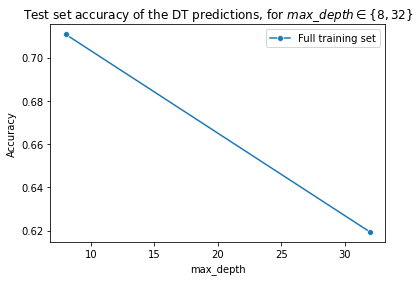

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{8, 32\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()



Is this picture conclusive for determining a good value of `max_depth`?

Let's work with more than values for max depth.

The code bellow trains six Decision Tree classifiers with different values of `max_depth`.
Inpsect the accuracy scores and note the optimal value for `max_depth`.



In [13]:
max_depth_range = [2**i for i in range(6)] 
acc = []

print("Accuracy scores:")
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))
    
      


Accuracy scores:
Max Depth=1, accuracy score: 0.7107411034933072
Max Depth=2, accuracy score: 0.7107411034933072
Max Depth=4, accuracy score: 0.7143323539014038
Max Depth=8, accuracy score: 0.7107411034933072
Max Depth=16, accuracy score: 0.6637936663401893
Max Depth=32, accuracy score: 0.6182174338883447


Let's visualize the results

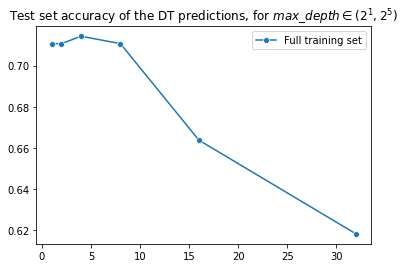

In [14]:
x = max_depth_range
    
fig = plt.figure()
p_grid = sns.lineplot(x=x, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in(2^1, 2^{5})$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()



## Deep Dive: Identify the Most Important Features

Every time we fit a `sklearn` decision tree model to the data, the resulting `model` object will contain an attribute that stores the importance scores for all features in the data:

In [15]:
model = DecisionTreeClassifier(min_samples_leaf = 100, max_depth = 20, criterion = 'entropy')
model.fit(X_train, y_train)

fi = model.feature_importances_
fi[:5]

array([0.05166069, 0.00161232, 0.01458367, 0.01012555, 0.        ])

Let us sort the feature *names* by their importance:

In [16]:
names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]

We are now ready to plot the top 10 most predictive features on which the examples were split:

Text(0, 0.5, 'Normalized importance')

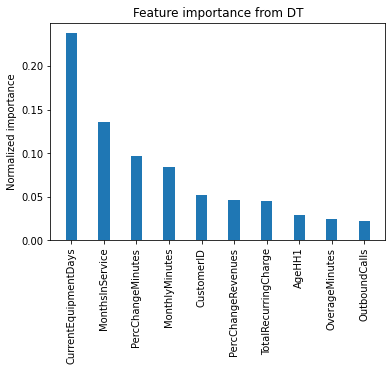

In [17]:
fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(model.feature_importances_, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

For predicting the `Churn` class label, these were the most important features to split the data on.